Coefficients: [0.34436445 1.00142073 0.65691539 0.31804928 0.66865308 0.96918717
 0.98947294 0.34131356 0.68330383]
Intercept: 0.01432759815122786


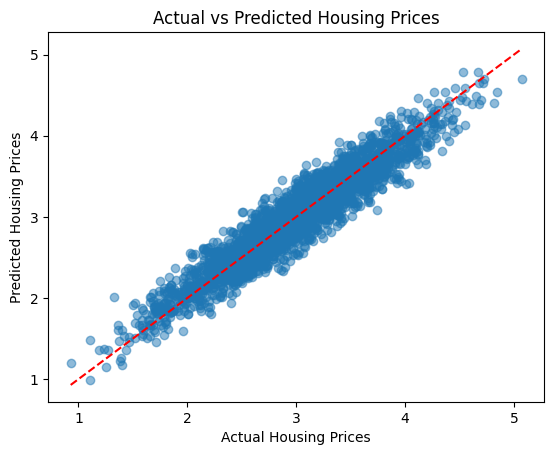

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate random data for the three dataframes
# DataFrame 1: Location and Crime
location_data = pd.DataFrame({
    'near_urban': np.random.rand(5000),
    'crime_free': np.random.rand(5000),
    'view': np.random.rand(5000)
})

# DataFrame 2: Age and Size
house_data = pd.DataFrame({
    'size': np.random.rand(5000),
    'age': np.random.rand(5000),
    'style': np.random.rand(5000)
})

# DataFrame 3: Government Policy
policy_data = pd.DataFrame({
    'policy': np.random.rand(5000),
    'tax': np.random.rand(5000),
    'growth': np.random.rand(5000)
})

# Generate housing prices based on the linear utility function
# Assuming the linear utility function:
housing_prices = (
    1/3 * location_data['near_urban'] +
    1 * location_data['crime_free'] +
    2/3 * location_data['view']+
    1/3 * house_data['size'] +
    2/3 * house_data['age'] +
    1 * house_data['style'] +
    1 * policy_data['policy'] +
    1/3 * policy_data['tax']+
    2/3 * policy_data['growth']+
    np.random.normal(scale=0.2, size=5000)  # Adding some random noise
)

# Combine the dataframes
combined_data = pd.concat([location_data, house_data, policy_data], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Make predictions on the test set
predictions = model.predict(X_test)

import matplotlib.pyplot as plt

# Visualize the actual vs predicted housing prices
plt.scatter(y_test, predictions, alpha=0.5)

# Identity line
min_val = min(y_test.min(), predictions.min())  # Find the minimum value for starting point
max_val = max(y_test.max(), predictions.max())  # Find the maximum value for ending point
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # Plotting the line with red dashes

plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()


In [ ]:
################################BOD and MOD application##############################################
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

execution_times_MOD=[]
execution_times_BOD=[]
# row=10000

TheRows=[5000,10000,15000]
column=3

# TheColumns=[3,6,9]
# for i in TheColumns:
#   column=i


for i in TheRows:
  row=i

  import pandas as pd
  import random

# Set seed for reproducibility
  np.random.seed(42)

# Generate random data for the three dataframes
# DataFrame 1: Location and Crime
  location_data = pd.DataFrame({
    'near_urban': np.random.rand(row),
    'crime_free': np.random.rand(row),
    'view': np.random.rand(row)
})

# DataFrame 2: Age and Size
  house_data = pd.DataFrame({
    'size': np.random.rand(row),
    'age': np.random.rand(row),
    'style': np.random.rand(row)
})

# DataFrame 3: Government Policy
  policy_data = pd.DataFrame({
    'policy': np.random.rand(row),
    'tax': np.random.rand(row),
    'growth': np.random.rand(row)
})

# Combine the dataframes
  combined_data = pd.concat([location_data, house_data, policy_data], axis=1)


##################################################   BOD      ######################################################################
# Record the starting time
  start_time_BOD = time.time()
# Selecting specific columns from the combined DataFrame
  new_combined_df=combined_data
  selected_columns_1 = new_combined_df[['crime_free', 'style', 'policy']]

# Find the maximum sum among all rows
  max_row_sum_1 = selected_columns_1.sum(axis=1).max()

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_1 = selected_columns_1.sum(axis=1).idxmax()
  y_min_1=max_row_sum_1

# Calculate the sum of values in the row with index max_sum_index
  y_max_1 = new_combined_df.loc[max_sum_index_1].sum()

  sum_all_rows_1=new_combined_df.sum(axis=1)
  return_sum_list_1=[]
  return_index_list_1=[]
  for i in sum_all_rows_1:
    if i<=y_max_1 and i>= y_min_1:
      return_sum_list_1.append(i)

  for idx, i in enumerate(new_combined_df.sum(axis=1)):
      for j in return_sum_list_1:
          if i == j:
              return_index_list_1.append(idx)

  distinct_values_1 = list(set(return_index_list_1))
######################################################## ROUND 2 ############################################################

# List of specific indices to select is distinct_values_1
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_1st_dataframe = new_combined_df.iloc[distinct_values_1].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_2 = filter_1st_dataframe[['crime_free', 'style', 'policy','view','age','growth']]

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_2)

# Find the maximum sum among all rows
  max_row_sum_2 = selected_columns_2.sum(axis=1).max()
# print(max_row_sum_2)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_2 = selected_columns_2.sum(axis=1).idxmax()
# print(max_sum_index_2)
  y_min_2=max_row_sum_2

# Calculate the sum of values in the row with index max_sum_index
  y_max_2 = filter_1st_dataframe.loc[max_sum_index_2].sum()
# print(y_max_2)

  sum_all_rows_2=filter_1st_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_2=[]
  return_index_list_2=[]
  for i in sum_all_rows_2:
    if i<=y_max_2 and i>= y_min_2:
      return_sum_list_2.append(i)

  for idx, i in enumerate(filter_1st_dataframe.sum(axis=1)):
      for j in return_sum_list_2:
          if i == j:
              return_index_list_2.append(idx)

# print(return_index_list)
  distinct_values_2 = list(set(return_index_list_2))
# print(distinct_values_2)

# b=0
# for i in range(len(distinct_values_2)):
#   b+=1
# print(b)

######################################################## ROUND 3 - final round in 3 columns table ############################################################

# List of specific indices to select is distinct_values_2
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_2nd_theFinal_dataframe = filter_1st_dataframe.iloc[distinct_values_2].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_3 = filter_2nd_theFinal_dataframe

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_3)

# Find the maximum sum among all rows
  max_row_sum_3 = selected_columns_3.sum(axis=1).max()
# print(max_row_sum_3)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_3 = selected_columns_3.sum(axis=1).idxmax()
# print(max_sum_index_3)

  y_min_3=max_row_sum_3

# Calculate the sum of values in the row with index max_sum_index
  y_max_3 = filter_2nd_theFinal_dataframe.loc[max_sum_index_3].sum()
# print(y_max_3)

  sum_all_rows_3=filter_2nd_theFinal_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_3=[]
  return_index_list_3=[]
  for i in sum_all_rows_3:
    if i<=y_max_3 and i>= y_min_3:
      return_sum_list_3.append(i)

  for idx, i in enumerate(filter_2nd_theFinal_dataframe.sum(axis=1)):
      for j in return_sum_list_3:
        if i == j:
              return_index_list_3.append(idx)

  distinct_values_3 = list(set(return_index_list_3))


# Record the ending time
  end_time_BOD = time.time()

# Calculate the running time by finding the difference
  running_time_seconds_BOD = end_time_BOD - start_time_BOD
  print(f"Running time for BOD: {running_time_seconds_BOD} seconds")
  execution_times_BOD.append(running_time_seconds_BOD)
########################################################################################################################

################################################# MOD  #################################################################

# Record the starting time
  start_time_MOD = time.time()
# Generate housing prices based on the linear utility function
# Assuming the linear utility function: housing_price = 2 * near_urban + 1.5 * crime_free + 0.8 * age + 1.2 * size + 0.5 * policy + noise
  housing_prices = (
    1/3 * location_data['near_urban'] +
    1 * location_data['crime_free'] +
    2/3 * location_data['view']+
    1/3 * house_data['size'] +
    2/3 * house_data['age'] +
    1 * house_data['style'] +
    1 * policy_data['policy'] +
    1/3 * policy_data['tax']+
    2/3 * policy_data['growth']+
    np.random.normal(scale=0.2, size=row)  # Adding some random noise
)


# Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

# Create and train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

# Get the coefficients
  coefficients = model.coef_
  intercept = model.intercept_

# # Print the coefficients
#   print(f'Coefficients: {coefficients}')
#   print(f'Intercept: {intercept}')

# Make predictions on the test set
  predictions = model.predict(X_test)

# # Visualize the actual vs predicted housing prices
#   plt.scatter(y_test, predictions)
#   plt.xlabel('Actual Housing Prices')
#   plt.ylabel('Predicted Housing Prices')
#   plt.title('Actual vs Predicted Housing Prices')
#   plt.show()

#################################################################################################################

# Record the ending time
  end_time_MOD = time.time()

# Calculate the running time by finding the difference
  running_time_seconds_MOD = end_time_MOD - start_time_MOD
  print(f"Running time for MOD: {running_time_seconds_MOD} seconds")
  execution_times_MOD.append(running_time_seconds_MOD)
########################################################################################################################



Running time for BOD: 1.1678707599639893 seconds
Running time for MOD: 0.011237621307373047 seconds
Running time for BOD: 6.079267740249634 seconds
Running time for MOD: 0.012763261795043945 seconds
Running time for BOD: 10.647879600524902 seconds
Running time for MOD: 0.009322643280029297 seconds


In [ ]:
################################BOD and MOD application##############################################
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

execution_times_MOD=[]
execution_times_BOD=[]
row=10000

# TheRows=[5000,10000,15000]
# column=3

TheColumns=[3,4,5]
for i in TheColumns:
  column=i


# for i in TheRows:
#   row=i

  import pandas as pd
  import random

# Set seed for reproducibility
  np.random.seed(42)

# Generate random data for the three dataframes
# DataFrame 1: Location and Crime
  location_data = pd.DataFrame({
    'near_urban': np.random.rand(row),
    'crime_free': np.random.rand(row),
    'view': np.random.rand(row),
    'neighbor': np.random.rand(row),
    'noise_free': np.random.rand(row)
})

# DataFrame 2: Age and Size
  house_data = pd.DataFrame({
    'size': np.random.rand(row),
    'age': np.random.rand(row),
    'style': np.random.rand(row),
    'color': np.random.rand(row),
    'material':np.random.rand(row)
})

# DataFrame 3: Government Policy
  policy_data = pd.DataFrame({
    'policy': np.random.rand(row),
    'tax': np.random.rand(row),
    'growth': np.random.rand(row),
    'healthcare':np.random.rand(row),
    'voting':np.random.rand(row)
})

# Combine the dataframes
  combined_data = pd.concat([location_data, house_data, policy_data], axis=1)


##################################################   BOD      ######################################################################
# Record the starting time
  start_time_BOD = time.time()
# Selecting specific columns from the combined DataFrame
  new_combined_df=combined_data
  selected_columns_1 = new_combined_df[['crime_free', 'style', 'policy']]

# Find the maximum sum among all rows
  max_row_sum_1 = selected_columns_1.sum(axis=1).max()

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_1 = selected_columns_1.sum(axis=1).idxmax()
  y_min_1=max_row_sum_1

# Calculate the sum of values in the row with index max_sum_index
  y_max_1 = new_combined_df.loc[max_sum_index_1].sum()

  sum_all_rows_1=new_combined_df.sum(axis=1)
  return_sum_list_1=[]
  return_index_list_1=[]
  for i in sum_all_rows_1:
    if i<=y_max_1 and i>= y_min_1:
      return_sum_list_1.append(i)

  for idx, i in enumerate(new_combined_df.sum(axis=1)):
      for j in return_sum_list_1:
          if i == j:
              return_index_list_1.append(idx)

  distinct_values_1 = list(set(return_index_list_1))
######################################################## ROUND 2 ############################################################

# List of specific indices to select is distinct_values_1
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_1st_dataframe = new_combined_df.iloc[distinct_values_1].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_2 = filter_1st_dataframe[['crime_free', 'style', 'policy','view','age','growth']]

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_2)

# Find the maximum sum among all rows
  max_row_sum_2 = selected_columns_2.sum(axis=1).max()
# print(max_row_sum_2)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_2 = selected_columns_2.sum(axis=1).idxmax()
# print(max_sum_index_2)
  y_min_2=max_row_sum_2

# Calculate the sum of values in the row with index max_sum_index
  y_max_2 = filter_1st_dataframe.loc[max_sum_index_2].sum()
# print(y_max_2)

  sum_all_rows_2=filter_1st_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_2=[]
  return_index_list_2=[]
  for i in sum_all_rows_2:
    if i<=y_max_2 and i>= y_min_2:
      return_sum_list_2.append(i)

  for idx, i in enumerate(filter_1st_dataframe.sum(axis=1)):
      for j in return_sum_list_2:
          if i == j:
              return_index_list_2.append(idx)

# print(return_index_list)
  distinct_values_2 = list(set(return_index_list_2))
# print(distinct_values_2)

# b=0
# for i in range(len(distinct_values_2)):
#   b+=1
# print(b)

######################################################## ROUND 3 in n columns table ############################################################

# List of specific indices to select is distinct_values_2
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_2nd_theFinal_dataframe = filter_1st_dataframe.iloc[distinct_values_2].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_3 = filter_2nd_theFinal_dataframe[['crime_free', 'style', 'policy','view','age','growth','near_urban','size','tax']]

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_3)

# Find the maximum sum among all rows
  max_row_sum_3 = selected_columns_3.sum(axis=1).max()
# print(max_row_sum_3)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_3 = selected_columns_3.sum(axis=1).idxmax()
# print(max_sum_index_3)

  y_min_3=max_row_sum_3

# Calculate the sum of values in the row with index max_sum_index
  y_max_3 = filter_2nd_theFinal_dataframe.loc[max_sum_index_3].sum()
# print(y_max_3)

  sum_all_rows_3=filter_2nd_theFinal_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_3=[]
  return_index_list_3=[]
  for i in sum_all_rows_3:
    if i<=y_max_3 and i>= y_min_3:
      return_sum_list_3.append(i)

  for idx, i in enumerate(filter_2nd_theFinal_dataframe.sum(axis=1)):
      for j in return_sum_list_3:
        if i == j:
              return_index_list_3.append(idx)

  distinct_values_3 = list(set(return_index_list_3))

######################################################## ROUND 4 in n columns table ############################################################

# List of specific indices to select is distinct_values_2
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_3rd_theFinal_dataframe = filter_2nd_theFinal_dataframe.iloc[distinct_values_3].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_4 = filter_3rd_theFinal_dataframe[['crime_free', 'style', 'policy','view','age','growth','near_urban','size','tax','neighbor','material','healthcare']]

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_4)

# Find the maximum sum among all rows
  max_row_sum_4 = selected_columns_4.sum(axis=1).max()
# print(max_row_sum_4)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_4 = selected_columns_4.sum(axis=1).idxmax()
# print(max_sum_index_4)

  y_min_4=max_row_sum_4

# Calculate the sum of values in the row with index max_sum_index
  y_max_4 = filter_3rd_theFinal_dataframe.loc[max_sum_index_4].sum()
# print(y_max_4)

  sum_all_rows_4=filter_3rd_theFinal_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_4=[]
  return_index_list_4=[]
  for i in sum_all_rows_4:
    if i<=y_max_4 and i>= y_min_4:
      return_sum_list_4.append(i)

  for idx, i in enumerate(filter_3rd_theFinal_dataframe.sum(axis=1)):
      for j in return_sum_list_4:
        if i == j:
              return_index_list_4.append(idx)

  distinct_values_4 = list(set(return_index_list_4))
######################################################## ROUND 5-final in n columns table ############################################################

# List of specific indices to select is distinct_values_2
# Selecting rows with specific indices using iloc and creating a new DataFrame with the same index
  filter_4th_theFinal_dataframe = filter_3rd_theFinal_dataframe.iloc[distinct_values_4].copy()

# Selecting specific columns from the combined DataFrame
  selected_columns_5 = filter_4th_theFinal_dataframe

# # Display the selected columns from the combined DataFrame
# print("\nSelected Columns:")
# print(selected_columns_5)

# Find the maximum sum among all rows
  max_row_sum_5 = selected_columns_5.sum(axis=1).max()
# print(max_row_sum_5)

# Find the index of the row(s) with the maximum sum among all rows
  max_sum_index_5 = selected_columns_5.sum(axis=1).idxmax()
# print(max_sum_index_5)

  y_min_5=max_row_sum_5

# Calculate the sum of values in the row with index max_sum_index
  y_max_5 = filter_4th_theFinal_dataframe.loc[max_sum_index_5].sum()
# print(y_max_5)

  sum_all_rows_5=filter_4th_theFinal_dataframe.sum(axis=1)
# print(sum_all_rows)

  return_sum_list_5=[]
  return_index_list_5=[]
  for i in sum_all_rows_5:
    if i<=y_max_5 and i>= y_min_5:
      return_sum_list_5.append(i)

  for idx, i in enumerate(filter_4th_theFinal_dataframe.sum(axis=1)):
      for j in return_sum_list_5:
        if i == j:
              return_index_list_5.append(idx)

  distinct_values_5 = list(set(return_index_list_5))

# Record the ending time
  end_time_BOD = time.time()

# Calculate the running time by finding the difference
  running_time_seconds_BOD = end_time_BOD - start_time_BOD
  print(f"Running time for BOD: {running_time_seconds_BOD} seconds")
  execution_times_BOD.append(running_time_seconds_BOD)
########################################################################################################################

################################################# MOD  #################################################################

# Record the starting time
  start_time_MOD = time.time()
# Generate housing prices based on the linear utility function
# Assuming the linear utility function: housing_price = 2 * near_urban + 1.5 * crime_free + 0.8 * age + 1.2 * size + 0.5 * policy + noise
  housing_prices = (
    1 * location_data['crime_free'] +
    4/5 * location_data['view']+
    3/5 * location_data['near_urban'] +
    2/5 * location_data['neighbor']+
    1/5 * location_data['noise_free']+

    1 * house_data['style'] +
    4/5 * house_data['age'] +
    3/5 * house_data['size'] +
    2/5 * house_data['material']+
    1/5 * house_data['color']+

    1 * policy_data['policy'] +
    4/5 * policy_data['growth']+
    3/5 * policy_data['tax']+
    2/5 * policy_data['healthcare']+
    1/5 * policy_data['voting']+
    np.random.normal(scale=0.2, size=row)  # Adding some random noise
)


# Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

# Create and train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

# Get the coefficients
  coefficients = model.coef_
  intercept = model.intercept_

# # Print the coefficients
#   print(f'Coefficients: {coefficients}')
#   print(f'Intercept: {intercept}')

# Make predictions on the test set
  predictions = model.predict(X_test)

# # Visualize the actual vs predicted housing prices
#   plt.scatter(y_test, predictions)
#   plt.xlabel('Actual Housing Prices')
#   plt.ylabel('Predicted Housing Prices')
#   plt.title('Actual vs Predicted Housing Prices')
#   plt.show()

#################################################################################################################

# Record the ending time
  end_time_MOD = time.time()

# Calculate the running time by finding the difference
  running_time_seconds_MOD = end_time_MOD - start_time_MOD
  print(f"Running time for MOD: {running_time_seconds_MOD} seconds")
  execution_times_MOD.append(running_time_seconds_MOD)
########################################################################################################################



Running time for BOD: 11.48581862449646 seconds
Running time for MOD: 0.016828060150146484 seconds
Running time for BOD: 11.551121234893799 seconds
Running time for MOD: 0.015228986740112305 seconds
Running time for BOD: 11.633313655853271 seconds
Running time for MOD: 0.012416362762451172 seconds


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Generate random data for different dataframes
row = 1000

location_data = pd.DataFrame({
    'near_urban': np.random.rand(row),
    'crime_free': np.random.rand(row),
    'view': np.random.rand(row)
})

house_data = pd.DataFrame({
    'size': np.random.rand(row),
    'age': np.random.rand(row),
    'style': np.random.rand(row)
})

policy_data = pd.DataFrame({
    'policy': np.random.rand(row),
    'tax': np.random.rand(row),
    'growth': np.random.rand(row)
})

# Combine the dataframes
combined_data = pd.concat([location_data, house_data, policy_data], axis=1)

# Generate housing prices based on the linear utility function
housing_prices = (
    1/3 * location_data['near_urban'] +
    1 * location_data['crime_free'] +
    2/3 * location_data['view'] +
    1/3 * house_data['size'] +
    2/3 * house_data['age'] +
    1 * house_data['style'] +
    1 * policy_data['policy'] +
    1/3 * policy_data['tax'] +
    2/3 * policy_data['growth'] +
    np.random.normal(scale=0.2, size=row)  # Adding some random noise
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

### 1. Implement PLOD (Predictive Linear Optimization Decision-making)
def run_plod(X_train, X_test, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_test)

### 2. Implement BOD (Business-Oriented Decision Making) with three rounds of filtering
def run_bod_three_rounds(X_test):
    # Round 1: Filter based on 'crime_free', 'style', 'policy'
    selected_columns_1 = X_test[['crime_free', 'style', 'policy']]
    max_row_sum_1 = selected_columns_1.sum(axis=1).max()
    max_sum_index_1 = selected_columns_1.sum(axis=1).idxmax()
    y_min_1 = max_row_sum_1
    y_max_1 = X_test.loc[max_sum_index_1].sum()

    sum_all_rows_1 = X_test.sum(axis=1)
    return_sum_list_1 = [i for i in sum_all_rows_1 if y_min_1 <= i <= y_max_1]
    return_index_list_1 = [idx for idx, i in enumerate(X_test.sum(axis=1)) if i in return_sum_list_1]
    distinct_values_1 = list(set(return_index_list_1))

    # Round 2: Filter based on additional columns after the first filter
    filter_1st_dataframe = X_test.iloc[distinct_values_1].copy()
    selected_columns_2 = filter_1st_dataframe[['crime_free', 'style', 'policy', 'view', 'age', 'growth']]
    max_row_sum_2 = selected_columns_2.sum(axis=1).max()
    max_sum_index_2 = selected_columns_2.sum(axis=1).idxmax()
    y_min_2 = max_row_sum_2
    y_max_2 = filter_1st_dataframe.loc[max_sum_index_2].sum()

    sum_all_rows_2 = filter_1st_dataframe.sum(axis=1)
    return_sum_list_2 = [i for i in sum_all_rows_2 if y_min_2 <= i <= y_max_2]
    return_index_list_2 = [idx for idx, i in enumerate(filter_1st_dataframe.sum(axis=1)) if i in return_sum_list_2]
    distinct_values_2 = list(set(return_index_list_2))

    # Round 3: Final filter based on the entire set of selected columns
    filter_2nd_theFinal_dataframe = filter_1st_dataframe.iloc[distinct_values_2].copy()
    selected_columns_3 = filter_2nd_theFinal_dataframe
    max_row_sum_3 = selected_columns_3.sum(axis=1).max()
    max_sum_index_3 = selected_columns_3.sum(axis=1).idxmax()
    y_min_3 = max_row_sum_3
    y_max_3 = filter_2nd_theFinal_dataframe.loc[max_sum_index_3].sum()

    sum_all_rows_3 = filter_2nd_theFinal_dataframe.sum(axis=1)
    return_sum_list_3 = [i for i in sum_all_rows_3 if y_min_3 <= i <= y_max_3]
    return_index_list_3 = [idx for idx, i in enumerate(filter_2nd_theFinal_dataframe.sum(axis=1)) if i in return_sum_list_3]
    distinct_values_3 = list(set(return_index_list_3))

    # Returning the sum of the filtered dataframe as the final BOD score
    return filter_2nd_theFinal_dataframe.iloc[distinct_values_3].sum(axis=1)

### 3. Implement Top-k Query Processing
def run_top_k(X_test, k=10):
    scores = X_test.sum(axis=1)
    top_k_indices = scores.nlargest(k).index
    return X_test.loc[top_k_indices].sum(axis=1)

### 4. Implement Skyline Query (Pareto front)
def run_skyline(X_test):
    pareto_mask = np.ones(X_test.shape[0], dtype=bool)
    for i, c in enumerate(X_test.values):
        if pareto_mask[i]:
            pareto_mask[pareto_mask] = np.any(X_test[pareto_mask] > c, axis=1)
            pareto_mask[i] = True
    return X_test[pareto_mask].sum(axis=1)

### 5. Implement OLAP-like aggregation
def run_olap(X_test):
    return X_test.sum(axis=1)

### 6. Implement Probabilistic Approximation (Random Sampling)
def run_approximation(X_test, sample_size=100):
    sampled_indices = np.random.choice(X_test.index, size=sample_size, replace=False)
    return X_test.loc[sampled_indices].sum(axis=1)

### 7. Implement Multi-objective Optimization (Weighted Sum)
def run_multi_objective(X_test):
    weights = np.random.rand(X_test.shape[1])
    weighted_sum = X_test.dot(weights)
    return weighted_sum

# Calculate precision and compare the algorithms
def calculate_precision(predictions, true_values, top_k=10):
    top_k_indices = np.argsort(predictions)[-top_k:]
    top_k_true_indices = np.argsort(true_values)[-top_k:]
    return len(set(top_k_indices).intersection(set(top_k_true_indices))) / top_k

# Run the PLOD and BOD algorithms
plod_predictions = run_plod(X_train, X_test, y_train)
bod_three_rounds_predictions = run_bod_three_rounds(X_test)

# Run the additional algorithms
top_k_predictions = run_top_k(X_test)
skyline_predictions = run_skyline(X_test)
olap_predictions = run_olap(X_test)
approximation_predictions = run_approximation(X_test)
multi_objective_predictions = run_multi_objective(X_test)

# Calculate precision for each algorithm
plod_precision = calculate_precision(plod_predictions, y_test)
bod_three_rounds_precision = calculate_precision(bod_three_rounds_predictions, y_test)
top_k_precision = calculate_precision(top_k_predictions, y_test)
skyline_precision = calculate_precision(skyline_predictions, y_test)
olap_precision = calculate_precision(olap_predictions, y_test)
approximation_precision = calculate_precision(approximation_predictions, y_test)
multi_objective_precision = calculate_precision(multi_objective_predictions, y_test)

# Prepare the results
comparison_results_corrected = {
    "Algorithm": ["PLOD", "BOD (Three Rounds)", "Top-k", "Skyline", "OLAP", "Approximation", "Multi-objective"],
    "Precision": [plod_precision, bod_three_rounds_precision, top_k_precision, skyline_precision, olap_precision, approximation_precision, multi_objective_precision]
}

comparison_df_corrected = pd.DataFrame(comparison_results_corrected)

# Display the comparison results
print(comparison_df_corrected)


            Algorithm  Precision
0                PLOD        0.7
1  BOD (Three Rounds)        0.0
2               Top-k        0.0
3             Skyline        0.0
4                OLAP        0.6
5       Approximation        0.0
6     Multi-objective        0.5


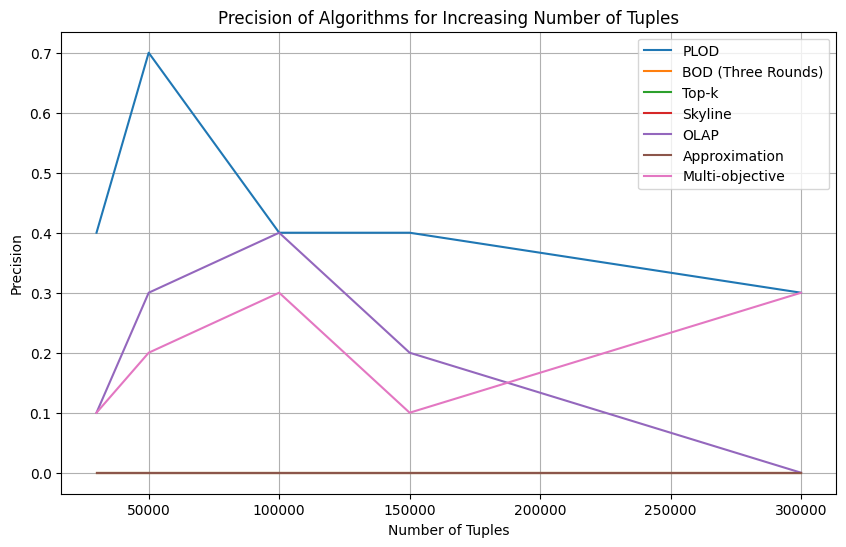

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Function to run the comparison for different dataset sizes
def run_comparison_for_different_sizes(sizes):
    results = {"Tuples": []}
    algorithms = ["PLOD", "BOD (Three Rounds)", "Top-k", "Skyline", "OLAP", "Approximation", "Multi-objective"]

    for alg in algorithms:
        results[alg] = []

    for size in sizes:
        # Generate random data
        location_data = pd.DataFrame({
            'near_urban': np.random.rand(size),
            'crime_free': np.random.rand(size),
            'view': np.random.rand(size)
        })

        house_data = pd.DataFrame({
            'size': np.random.rand(size),
            'age': np.random.rand(size),
            'style': np.random.rand(size)
        })

        policy_data = pd.DataFrame({
            'policy': np.random.rand(size),
            'tax': np.random.rand(size),
            'growth': np.random.rand(size)
        })

        combined_data = pd.concat([location_data, house_data, policy_data], axis=1)

        # Generate housing prices
        housing_prices = (
            1/3 * location_data['near_urban'] +
            1 * location_data['crime_free'] +
            2/3 * location_data['view'] +
            1/3 * house_data['size'] +
            2/3 * house_data['age'] +
            1 * house_data['style'] +
            1 * policy_data['policy'] +
            1/3 * policy_data['tax'] +
            2/3 * policy_data['growth'] +
            np.random.normal(scale=0.2, size=size)
        )

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

        # Calculate precision for each algorithm
        plod_precision = calculate_precision(run_plod(X_train, X_test, y_train), y_test)
        bod_precision = calculate_precision(run_bod_three_rounds(X_test), y_test)
        top_k_precision = calculate_precision(run_top_k(X_test), y_test)
        skyline_precision = calculate_precision(run_skyline(X_test), y_test)
        olap_precision = calculate_precision(run_olap(X_test), y_test)
        approximation_precision = calculate_precision(run_approximation(X_test), y_test)
        multi_objective_precision = calculate_precision(run_multi_objective(X_test), y_test)

        # Record results
        results["Tuples"].append(size)
        results["PLOD"].append(plod_precision)
        results["BOD (Three Rounds)"].append(bod_precision)
        results["Top-k"].append(top_k_precision)
        results["Skyline"].append(skyline_precision)
        results["OLAP"].append(olap_precision)
        results["Approximation"].append(approximation_precision)
        results["Multi-objective"].append(multi_objective_precision)

    return pd.DataFrame(results)

# Adjust the Top-k and Skyline functions to handle indices properly

### 3. Implement Top-k Query Processing
def run_top_k(X_test, k=10):
    scores = X_test.sum(axis=1)
    top_k_indices = scores.nlargest(k).index
    return scores.loc[top_k_indices]

### 4. Implement Skyline Query (Pareto front)
def run_skyline(X_test):
    pareto_mask = np.ones(X_test.shape[0], dtype=bool)
    for i, c in enumerate(X_test.values):
        if pareto_mask[i]:
            pareto_mask[pareto_mask] = np.any(X_test[pareto_mask] > c, axis=1)
            pareto_mask[i] = True
    return X_test[pareto_mask].sum(axis=1)

# Define different dataset sizes (number of tuples)
sizes = [30000, 50000, 100000, 150000, 300000]

# Run the comparison
comparison_df = run_comparison_for_different_sizes(sizes)

# Plot the results
plt.figure(figsize=(10, 6))

for alg in comparison_df.columns[1:]:
    plt.plot(comparison_df["Tuples"], comparison_df[alg], label=alg)

plt.xlabel("Number of Tuples")
plt.ylabel("Precision")
plt.title("Precision of Algorithms for Increasing Number of Tuples")
plt.legend()
plt.grid(True)
plt.show()


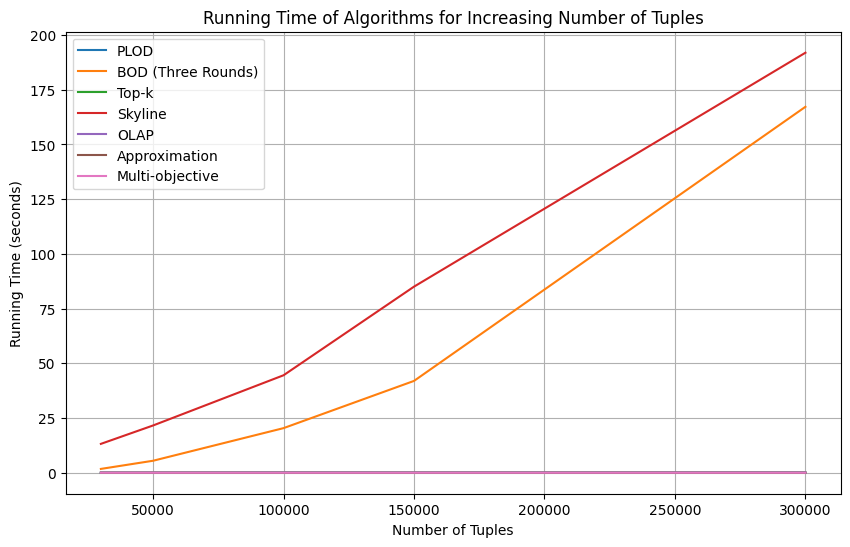

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Function to run the comparison for different dataset sizes and record running times
def run_time_comparison_for_different_sizes(sizes):
    time_results = {"Tuples": []}
    algorithms = ["PLOD", "BOD (Three Rounds)", "Top-k", "Skyline", "OLAP", "Approximation", "Multi-objective"]

    for alg in algorithms:
        time_results[alg] = []

    for size in sizes:
        # Generate random data
        location_data = pd.DataFrame({
            'near_urban': np.random.rand(size),
            'crime_free': np.random.rand(size),
            'view': np.random.rand(size)
        })

        house_data = pd.DataFrame({
            'size': np.random.rand(size),
            'age': np.random.rand(size),
            'style': np.random.rand(size)
        })

        policy_data = pd.DataFrame({
            'policy': np.random.rand(size),
            'tax': np.random.rand(size),
            'growth': np.random.rand(size)
        })

        combined_data = pd.concat([location_data, house_data, policy_data], axis=1)

        # Generate housing prices
        housing_prices = (
            1/3 * location_data['near_urban'] +
            1 * location_data['crime_free'] +
            2/3 * location_data['view'] +
            1/3 * house_data['size'] +
            2/3 * house_data['age'] +
            1 * house_data['style'] +
            1 * policy_data['policy'] +
            1/3 * policy_data['tax'] +
            2/3 * policy_data['growth'] +
            np.random.normal(scale=0.2, size=size)
        )

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(combined_data, housing_prices, test_size=0.5, random_state=42)

        # Measure time for PLOD (formerly MOD)
        start_time = time.time()
        run_plod(X_train, X_test, y_train)
        plod_time = time.time() - start_time

        # Measure time for BOD (Three Rounds)
        start_time = time.time()
        run_bod_three_rounds(X_test)
        bod_time = time.time() - start_time

        # Measure time for Top-k
        start_time = time.time()
        run_top_k(X_test)
        top_k_time = time.time() - start_time

        # Measure time for Skyline
        start_time = time.time()
        run_skyline(X_test)
        skyline_time = time.time() - start_time

        # Measure time for OLAP
        start_time = time.time()
        run_olap(X_test)
        olap_time = time.time() - start_time

        # Measure time for Approximation
        start_time = time.time()
        run_approximation(X_test)
        approximation_time = time.time() - start_time

        # Measure time for Multi-objective Optimization
        start_time = time.time()
        run_multi_objective(X_test)
        multi_objective_time = time.time() - start_time

        # Record results
        time_results["Tuples"].append(size)
        time_results["PLOD"].append(plod_time)
        time_results["BOD (Three Rounds)"].append(bod_time)
        time_results["Top-k"].append(top_k_time)
        time_results["Skyline"].append(skyline_time)
        time_results["OLAP"].append(olap_time)
        time_results["Approximation"].append(approximation_time)
        time_results["Multi-objective"].append(multi_objective_time)

    return pd.DataFrame(time_results)

# Define different dataset sizes (number of tuples)
sizes = [30000, 50000, 100000, 150000, 300000]

# Run the time comparison
time_comparison_df = run_time_comparison_for_different_sizes(sizes)

# Plot the running times
plt.figure(figsize=(10, 6))

for alg in time_comparison_df.columns[1:]:
    plt.plot(time_comparison_df["Tuples"], time_comparison_df[alg], label=alg)

plt.xlabel("Number of Tuples")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time of Algorithms for Increasing Number of Tuples")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "HousingData_Boston.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("Original Data:")
print(df.head())

# Handling missing values
# Fill NA/NaN values with the column mean
df.fillna(df.mean(), inplace=True)

# Normalize the data to be within the range [0, 1]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of the normalized dataframe
print("\nCleaned and Normalized Data:")
print(df_scaled.head())

# Save the cleaned and normalized dataset
df_scaled.to_csv("cleaned_normalized_housing_data.csv", index=False)


Original Data:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Cleaned and Normalized Data:
       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.0

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and clean the dataset
# Assuming 'combined_data.csv' contains the housing data with the columns: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
data = pd.read_csv('cleaned_normalized_housing_data.csv')

# Generate housing prices based on the new utility function
housing_prices = (
    0.5 * data['CRIM'] +
    0.3 * data['ZN'] +
    0.7 * data['INDUS'] +
    0.6 * data['CHAS'] +
    0.4 * data['NOX'] +
    0.8 * data['RM'] +
    0.2 * data['AGE'] +
    0.9 * data['DIS'] +
    0.1 * data['RAD'] +
    0.7 * data['TAX'] +
    0.5 * data['PTRATIO'] +
    0.3 * data['B'] +
    0.4 * data['LSTAT'] +
    np.random.normal(scale=0.2, size=len(data))  # Adding some random noise
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, housing_prices, test_size=0.5, random_state=42)

### 1. Implement PLOD (Predictive Linear Optimization Decision-making)
def run_plod(X_train, X_test, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_test)

### 2. Implement BOD (Business-Oriented Decision Making) with three rounds of filtering
def run_bod_three_rounds(X_test):
    # Round 1: Filter based on 'CRIM', 'ZN', 'INDUS'
    selected_columns_1 = X_test[['CRIM', 'ZN', 'INDUS']]
    max_row_sum_1 = selected_columns_1.sum(axis=1).max()
    max_sum_index_1 = selected_columns_1.sum(axis=1).idxmax()
    y_min_1 = max_row_sum_1
    y_max_1 = X_test.loc[max_sum_index_1].sum()

    sum_all_rows_1 = X_test.sum(axis=1)
    return_sum_list_1 = [i for i in sum_all_rows_1 if y_min_1 <= i <= y_max_1]
    return_index_list_1 = [idx for idx, i in enumerate(X_test.sum(axis=1)) if i in return_sum_list_1]
    distinct_values_1 = list(set(return_index_list_1))

    # Round 2: Filter based on additional columns after the first filter
    filter_1st_dataframe = X_test.iloc[distinct_values_1].copy()
    selected_columns_2 = filter_1st_dataframe[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM']]
    max_row_sum_2 = selected_columns_2.sum(axis=1).max()
    max_sum_index_2 = selected_columns_2.sum(axis=1).idxmax()
    y_min_2 = max_row_sum_2
    y_max_2 = filter_1st_dataframe.loc[max_sum_index_2].sum()

    sum_all_rows_2 = filter_1st_dataframe.sum(axis=1)
    return_sum_list_2 = [i for i in sum_all_rows_2 if y_min_2 <= i <= y_max_2]
    return_index_list_2 = [idx for idx, i in enumerate(filter_1st_dataframe.sum(axis=1)) if i in return_sum_list_2]
    distinct_values_2 = list(set(return_index_list_2))

    # Round 3: Final filter based on the entire set of selected columns
    filter_2nd_theFinal_dataframe = filter_1st_dataframe.iloc[distinct_values_2].copy()
    selected_columns_3 = filter_2nd_theFinal_dataframe
    max_row_sum_3 = selected_columns_3.sum(axis=1).max()
    max_sum_index_3 = selected_columns_3.sum(axis=1).idxmax()
    y_min_3 = max_row_sum_3
    y_max_3 = filter_2nd_theFinal_dataframe.loc[max_sum_index_3].sum()

    sum_all_rows_3 = filter_2nd_theFinal_dataframe.sum(axis=1)
    return_sum_list_3 = [i for i in sum_all_rows_3 if y_min_3 <= i <= y_max_3]
    return_index_list_3 = [idx for idx, i in enumerate(filter_2nd_theFinal_dataframe.sum(axis=1)) if i in return_sum_list_3]
    distinct_values_3 = list(set(return_index_list_3))

    # Returning the sum of the filtered dataframe as the final BOD score
    return filter_2nd_theFinal_dataframe.iloc[distinct_values_3].sum(axis=1)

### 3. Implement Top-k Query Processing
def run_top_k(X_test, k=10):
    scores = X_test.sum(axis=1)
    top_k_indices = scores.nlargest(k).index
    return X_test.loc[top_k_indices].sum(axis=1)

### 4. Implement Skyline Query (Pareto front)
def run_skyline(X_test):
    pareto_mask = np.ones(X_test.shape[0], dtype=bool)
    for i, c in enumerate(X_test.values):
        if pareto_mask[i]:
            pareto_mask[pareto_mask] = np.any(X_test[pareto_mask] > c, axis=1)
            pareto_mask[i] = True
    return X_test[pareto_mask].sum(axis=1)

### 5. Implement OLAP-like aggregation
def run_olap(X_test):
    return X_test.sum(axis=1)

### 6. Implement Probabilistic Approximation (Random Sampling)
def run_approximation(X_test, sample_size=100):
    sampled_indices = np.random.choice(X_test.index, size=sample_size, replace=False)
    return X_test.loc[sampled_indices].sum(axis=1)

### 7. Implement Multi-objective Optimization (Weighted Sum)
def run_multi_objective(X_test):
    weights = np.random.rand(X_test.shape[1])
    weighted_sum = X_test.dot(weights)
    return weighted_sum

# Calculate precision and compare the algorithms
def calculate_precision(predictions, true_values, top_k=10):
    top_k_indices = np.argsort(predictions)[-top_k:]
    top_k_true_indices = np.argsort(true_values)[-top_k:]
    return len(set(top_k_indices).intersection(set(top_k_true_indices))) / top_k

# Run the PLOD and BOD algorithms
plod_predictions = run_plod(X_train, X_test, y_train)
bod_three_rounds_predictions = run_bod_three_rounds(X_test)

# Run the additional algorithms
top_k_predictions = run_top_k(X_test)
skyline_predictions = run_skyline(X_test)
olap_predictions = run_olap(X_test)
approximation_predictions = run_approximation(X_test)
multi_objective_predictions = run_multi_objective(X_test)

# Calculate precision for each algorithm
plod_precision = calculate_precision(plod_predictions, y_test)
bod_three_rounds_precision = calculate_precision(bod_three_rounds_predictions, y_test)
top_k_precision = calculate_precision(top_k_predictions, y_test)
skyline_precision = calculate_precision(skyline_predictions, y_test)
olap_precision = calculate_precision(olap_predictions, y_test)
approximation_precision = calculate_precision(approximation_predictions, y_test)
multi_objective_precision = calculate_precision(multi_objective_predictions, y_test)

# Prepare the results
comparison_results = {
    "Algorithm": ["PLOD", "BOD (Three Rounds)", "Top-k", "Skyline", "OLAP", "Approximation", "Multi-objective"],
    "Precision": [plod_precision, bod_three_rounds_precision, top_k_precision, skyline_precision, olap_precision, approximation_precision, multi_objective_precision]
}

comparison_df = pd.DataFrame(comparison_results)

# Display the comparison results
print(comparison_df)


            Algorithm  Precision
0                PLOD        0.8
1  BOD (Three Rounds)        0.0
2               Top-k        0.0
3             Skyline        0.0
4                OLAP        0.8
5       Approximation        0.0
6     Multi-objective        0.9


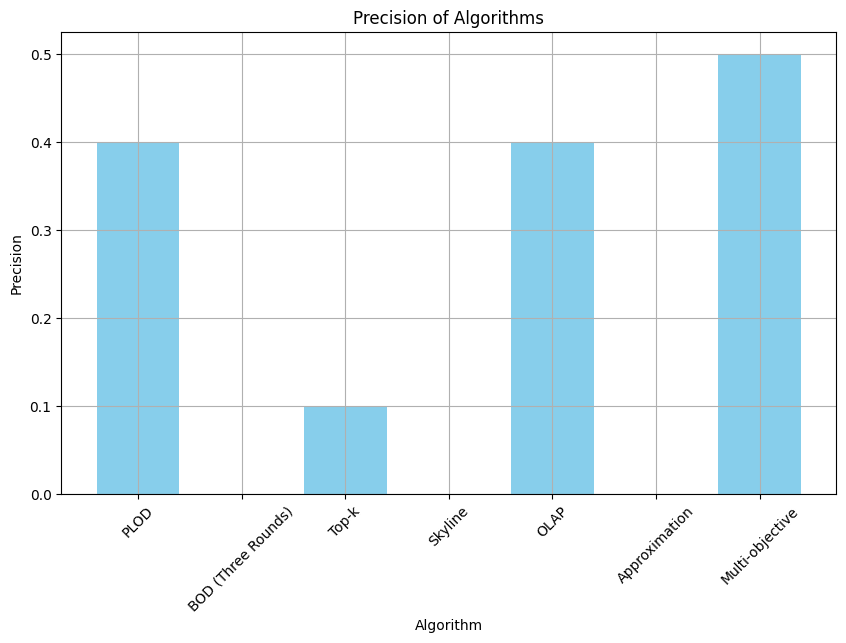

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the cleaned and normalized housing data
data = pd.read_csv('cleaned_normalized_housing_data.csv')

# Generate housing prices based on the new utility function
housing_prices = (
    0.5 * data['CRIM'] +
    0.3 * data['ZN'] +
    0.7 * data['INDUS'] +
    0.6 * data['CHAS'] +
    0.4 * data['NOX'] +
    0.8 * data['RM'] +
    0.2 * data['AGE'] +
    0.9 * data['DIS'] +
    0.1 * data['RAD'] +
    0.7 * data['TAX'] +
    0.5 * data['PTRATIO'] +
    0.3 * data['B'] +
    0.4 * data['LSTAT'] +
    np.random.normal(scale=0.2, size=len(data))  # Adding some random noise
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, housing_prices, test_size=0.5, random_state=42)

# Function to calculate precision and compare algorithms
def compare_algorithms(X_train, X_test, y_train, y_test):
    algorithms = ["PLOD", "BOD (Three Rounds)", "Top-k", "Skyline", "OLAP", "Approximation", "Multi-objective"]
    results = {"Algorithm": [], "Precision": []}

    # Calculate precision for each algorithm
    plod_precision = calculate_precision(run_plod(X_train, X_test, y_train), y_test)
    results["Algorithm"].append("PLOD")
    results["Precision"].append(plod_precision)

    bod_precision = calculate_precision(run_bod_three_rounds(X_test), y_test)
    results["Algorithm"].append("BOD (Three Rounds)")
    results["Precision"].append(bod_precision)

    top_k_precision = calculate_precision(run_top_k(X_test), y_test)
    results["Algorithm"].append("Top-k")
    results["Precision"].append(top_k_precision)

    skyline_precision = calculate_precision(run_skyline(X_test), y_test)
    results["Algorithm"].append("Skyline")
    results["Precision"].append(skyline_precision)

    olap_precision = calculate_precision(run_olap(X_test), y_test)
    results["Algorithm"].append("OLAP")
    results["Precision"].append(olap_precision)

    approximation_precision = calculate_precision(run_approximation(X_test), y_test)
    results["Algorithm"].append("Approximation")
    results["Precision"].append(approximation_precision)

    multi_objective_precision = calculate_precision(run_multi_objective(X_test), y_test)
    results["Algorithm"].append("Multi-objective")
    results["Precision"].append(multi_objective_precision)

    return pd.DataFrame(results)

# Run the comparison
comparison_df = compare_algorithms(X_train, X_test, y_train, y_test)

# Plot the results
plt.figure(figsize=(10, 6))

plt.bar(comparison_df["Algorithm"], comparison_df["Precision"], color='skyblue')

plt.xlabel("Algorithm")
plt.ylabel("Precision")
plt.title("Precision of Algorithms")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


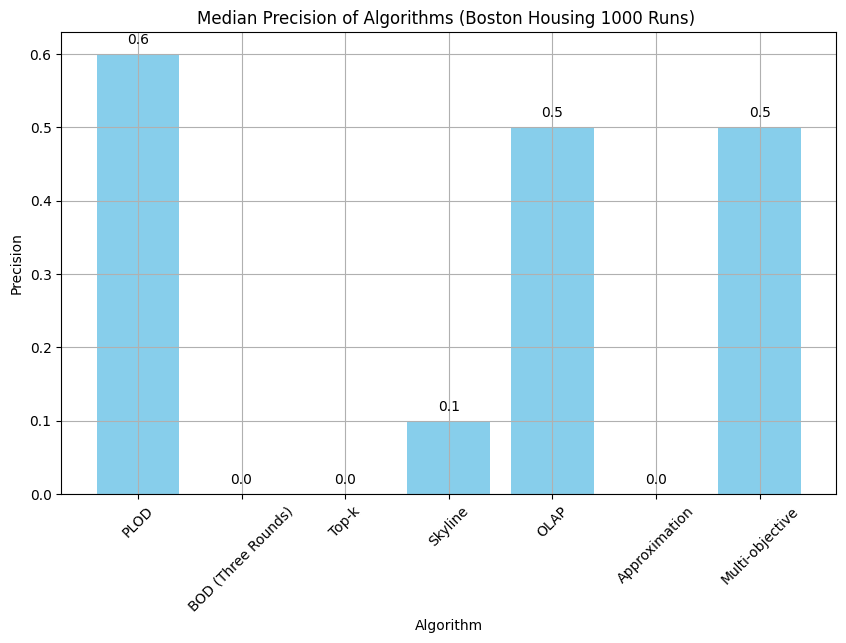

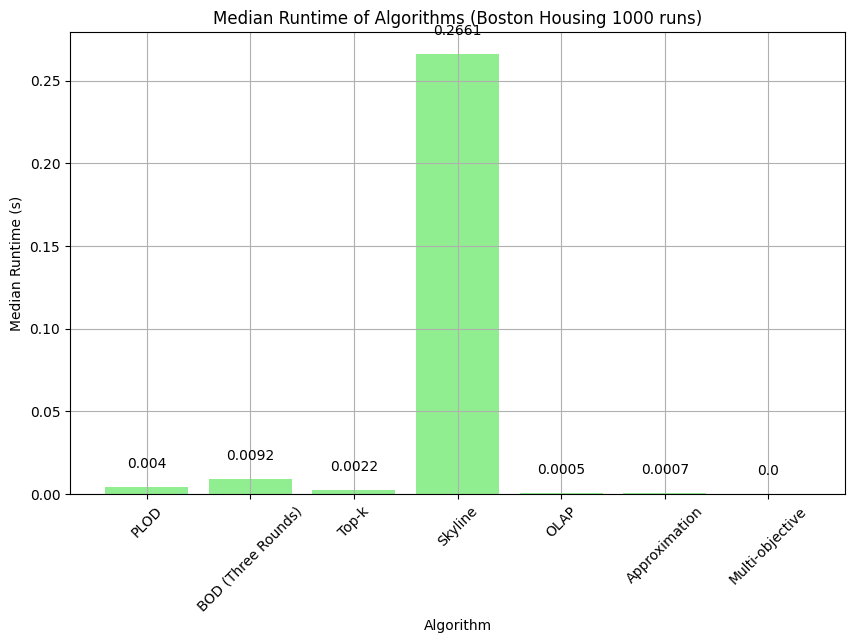

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time

# Load the cleaned and normalized housing data
data = pd.read_csv('cleaned_normalized_housing_data.csv')

# Generate housing prices based on the new utility function
housing_prices = (
    0.5 * data['CRIM'] +
    0.3 * data['ZN'] +
    0.7 * data['INDUS'] +
    0.6 * data['CHAS'] +
    0.4 * data['NOX'] +
    0.8 * data['RM'] +
    0.2 * data['AGE'] +
    0.9 * data['DIS'] +
    0.1 * data['RAD'] +
    0.7 * data['TAX'] +
    0.5 * data['PTRATIO'] +
    0.3 * data['B'] +
    0.4 * data['LSTAT'] +
    np.random.normal(scale=0.2, size=len(data))  # Adding some random noise
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, housing_prices, test_size=0.5, random_state=42)

# Function to calculate precision and median runtime for each algorithm
def compare_algorithms_runtime(X_train, X_test, y_train, y_test, runs=1000):
    algorithms = ["PLOD", "BOD (Three Rounds)", "Top-k", "Skyline", "OLAP", "Approximation", "Multi-objective"]
    results = {"Algorithm": [], "Precision": [], "Median Runtime (s)": []}

    def median_runtime(algorithm_func, *args):
        runtimes = []
        for _ in range(runs):
            start_time = time.time()
            algorithm_func(*args)
            runtimes.append(time.time() - start_time)
        return np.median(runtimes)

    # PLOD
    plod_predictions = run_plod(X_train, X_test, y_train)
    plod_precision = calculate_precision(plod_predictions, y_test)
    plod_median_runtime = median_runtime(run_plod, X_train, X_test, y_train)
    results["Algorithm"].append("PLOD")
    results["Precision"].append(plod_precision)
    results["Median Runtime (s)"].append(plod_median_runtime)

    # BOD (Three Rounds)
    bod_predictions = run_bod_three_rounds(X_test)
    bod_precision = calculate_precision(bod_predictions, y_test)
    bod_median_runtime = median_runtime(run_bod_three_rounds, X_test)
    results["Algorithm"].append("BOD (Three Rounds)")
    results["Precision"].append(bod_precision)
    results["Median Runtime (s)"].append(bod_median_runtime)

    # Top-k
    top_k_predictions = run_top_k(X_test)
    top_k_precision = calculate_precision(top_k_predictions, y_test)
    top_k_median_runtime = median_runtime(run_top_k, X_test)
    results["Algorithm"].append("Top-k")
    results["Precision"].append(top_k_precision)
    results["Median Runtime (s)"].append(top_k_median_runtime)

    # Skyline
    skyline_predictions = run_skyline(X_test)
    skyline_precision = calculate_precision(skyline_predictions, y_test)
    skyline_median_runtime = median_runtime(run_skyline, X_test)
    results["Algorithm"].append("Skyline")
    results["Precision"].append(skyline_precision)
    results["Median Runtime (s)"].append(skyline_median_runtime)

    # OLAP
    olap_predictions = run_olap(X_test)
    olap_precision = calculate_precision(olap_predictions, y_test)
    olap_median_runtime = median_runtime(run_olap, X_test)
    results["Algorithm"].append("OLAP")
    results["Precision"].append(olap_precision)
    results["Median Runtime (s)"].append(olap_median_runtime)

    # Approximation
    approximation_predictions = run_approximation(X_test)
    approximation_precision = calculate_precision(approximation_predictions, y_test)
    approximation_median_runtime = median_runtime(run_approximation, X_test)
    results["Algorithm"].append("Approximation")
    results["Precision"].append(approximation_precision)
    results["Median Runtime (s)"].append(approximation_median_runtime)

    # Multi-objective
    multi_objective_predictions = run_multi_objective(X_test)
    multi_objective_precision = calculate_precision(multi_objective_predictions, y_test)
    multi_objective_median_runtime = median_runtime(run_multi_objective, X_test)
    results["Algorithm"].append("Multi-objective")
    results["Precision"].append(multi_objective_precision)
    results["Median Runtime (s)"].append(multi_objective_median_runtime)

    return pd.DataFrame(results)

# Run the comparison
comparison_df = compare_algorithms_runtime(X_train, X_test, y_train, y_test)

# Plot the precision results
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df["Algorithm"], comparison_df["Precision"], color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Precision")
plt.title("Median Precision of Algorithms (Boston Housing 1000 Runs) ")
plt.xticks(rotation=45)
plt.grid(True)

# Add precision labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.show()

# Plot the median runtime results
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df["Algorithm"], comparison_df["Median Runtime (s)"], color='lightgreen')
plt.xlabel("Algorithm")
plt.ylabel("Median Runtime (s)")
plt.title("Median Runtime of Algorithms (Boston Housing 1000 runs)")
plt.xticks(rotation=45)
plt.grid(True)

# Add median runtime labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.show()
